In [1]:
%load_ext autoreload
%autoreload 2

import os
from os.path import join
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from copy import deepcopy
mpl.style.use('style.mcstyle')


In [2]:
from cmass.summary.tools import load_lightcone

wdir = '/anvil/scratch/x-mho1/cmass-ili'

In [ ]:
suite = 'abacuslike'
sim = 'fastpm'
L = 2000
N = 256
hod_seed = 0
aug_seed = 0

lhid = 88
simpath = join(wdir, suite, sim, f'L{L}-N{N}', str(lhid))

In [15]:
import h5py
filename = join(simpath, 'sgc_lightcone', 'hod00885_aug00000.h5')
with h5py.File(filename, 'r') as f:
    ra, dec, z = f['ra'][:], f['dec'][:], f['z'][:]
srdz = np.stack([ra, dec, z], axis=1)

filename = join(simpath, 'simbig_lightcone', 'hod00885_aug00000.h5')
with h5py.File(filename, 'r') as f:
    ra, dec, z = f['ra'][:], f['dec'][:], f['z'][:]
brdz = np.stack([ra, dec, z], axis=1)

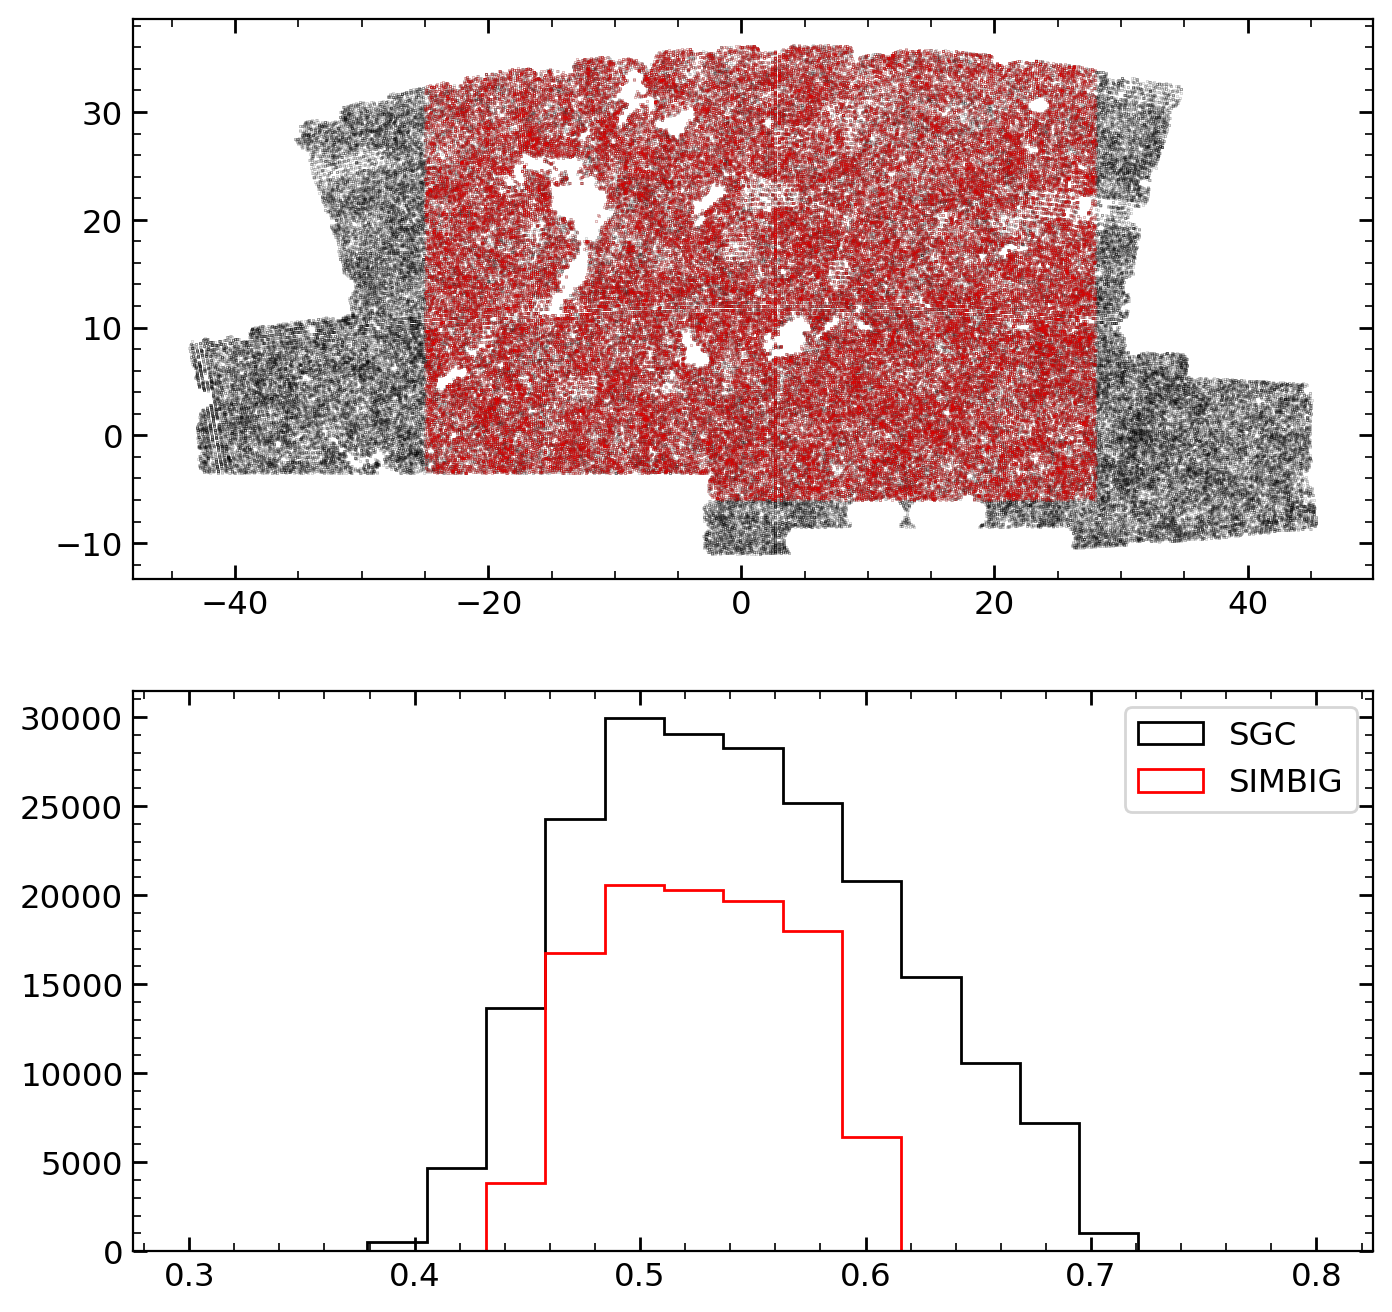

In [ ]:
f, axs = plt.subplots(2, 1, figsize=(8, 8), dpi=200)
ax = axs[0]
ax.plot((srdz[:, 0]+180) % 360-180, srdz[:, 1], 'k.', markersize=0.1)
ax.plot((brdz[:, 0]+180) % 360-180, brdz[:, 1], 'r.', markersize=0.1)

ax = axs[1]
bins = np.linspace(0.3, 0.8, 20)
ax.hist(srdz[:, 2], bins=bins, histtype='step', color='k', lw=2, label='SGC')
ax.hist(brdz[:, 2], bins=bins, histtype='step', color='r', lw=2, label='SIMBIG')
ax.legend()

In [ ]:
from cmass.survey.tools import sky_to_xyz
from astropy import cosmology
cosmo = cosmology.Planck18


xyz = sky_to_xyz(brdz, cosmo)
print('min', xyz.min(axis=0))
print('max', xyz.max(axis=0))

min [ 885.65154652 -644.22709719 -159.78535697]
max [1537.24089936  714.85150206  905.06537841]


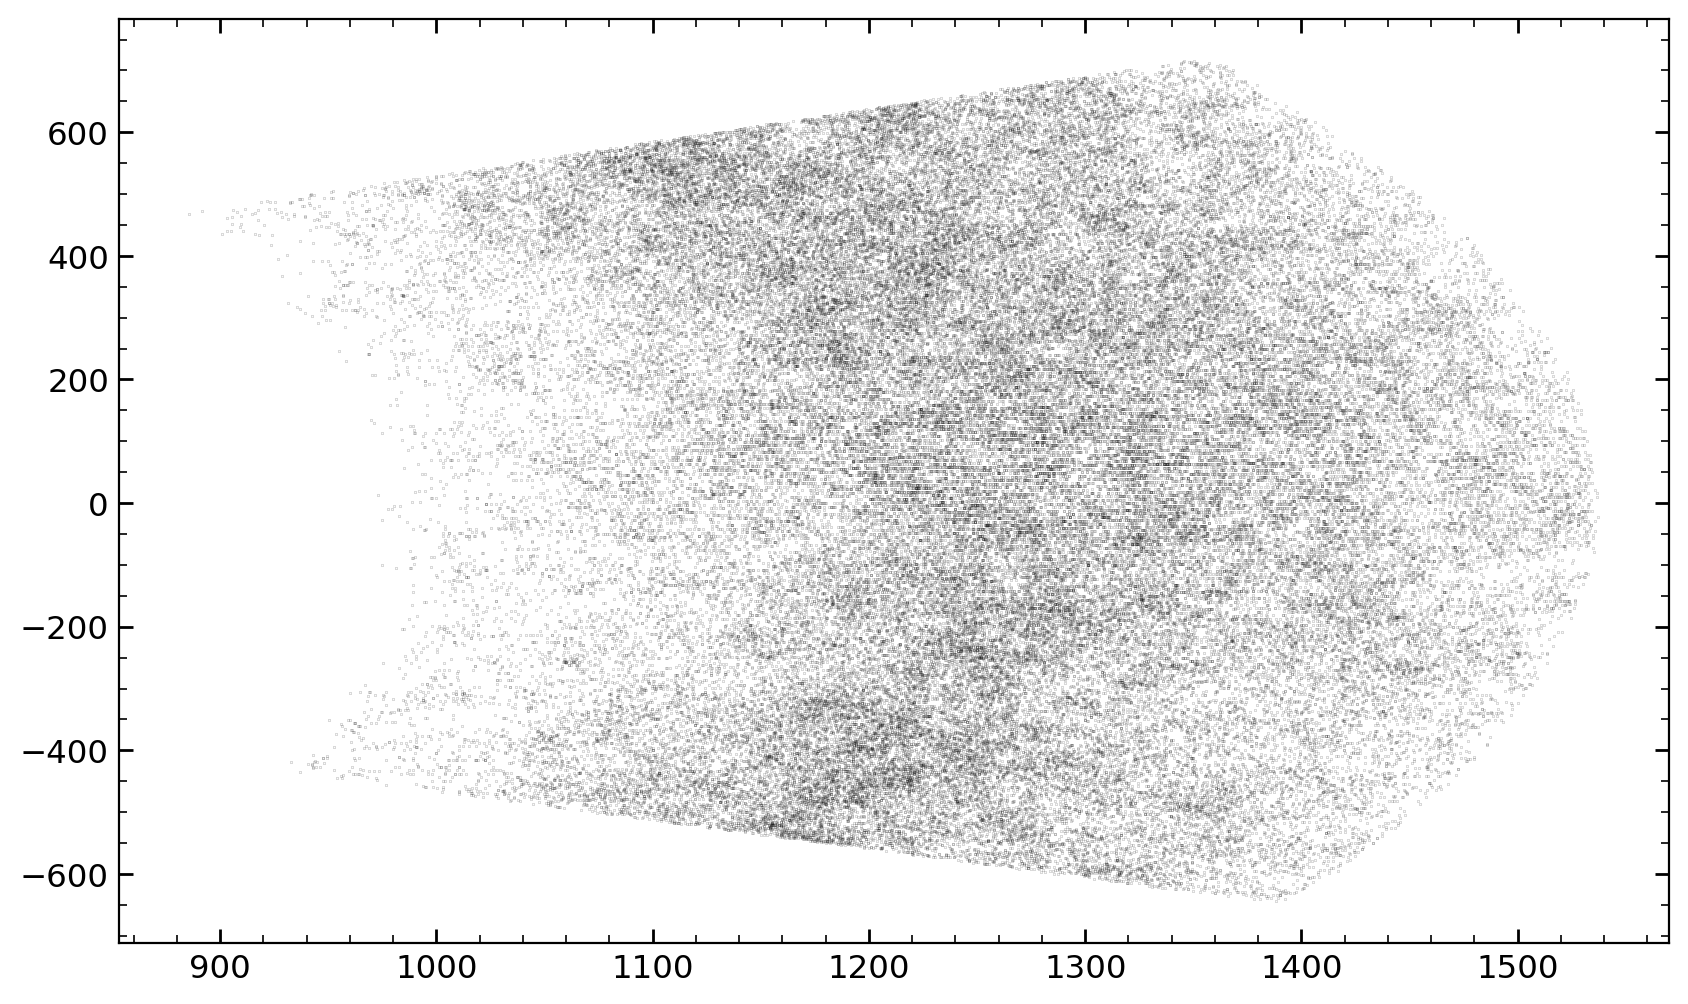

In [29]:
plt.plot(xyz[:, 0], xyz[:, 1], 'k.', markersize=0.1)

In [11]:
grdz, gweights = load_lightcone(
    simpath,
    hod_seed=hod_seed,
    aug_seed=aug_seed,
    is_North=False
)

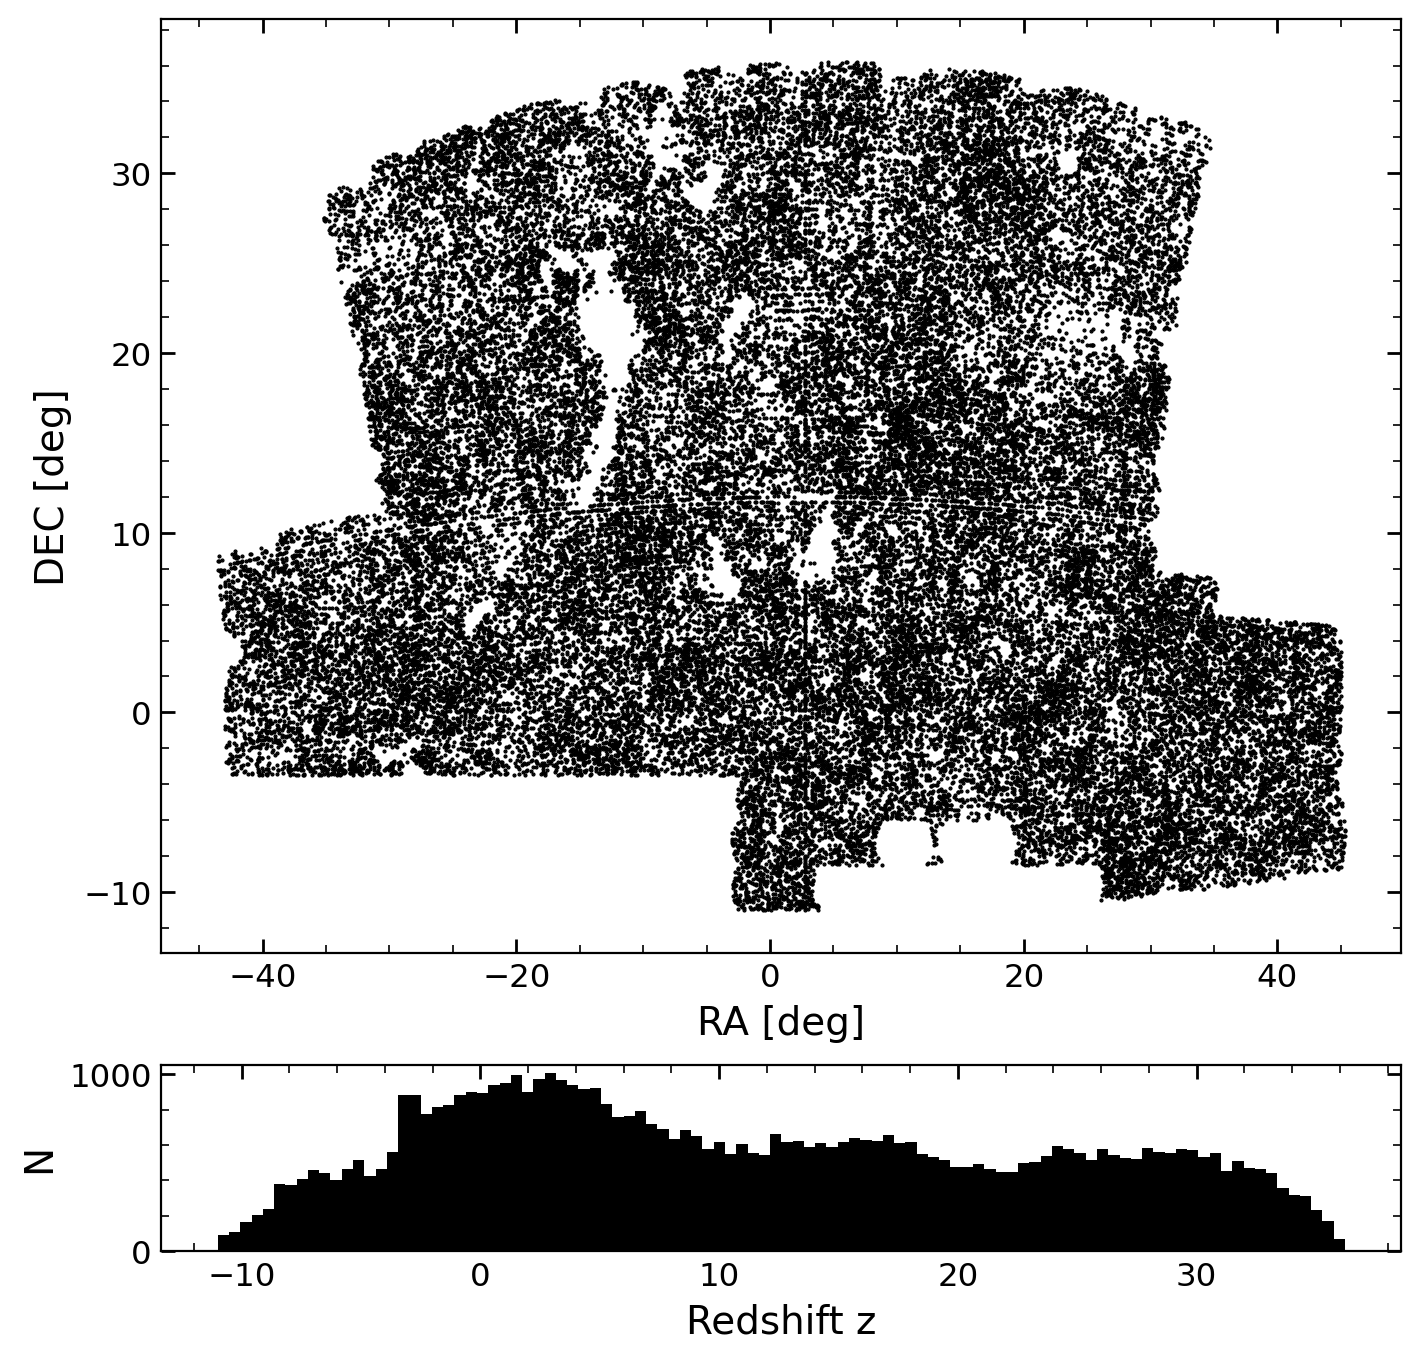

In [ ]:
f, axs = plt.subplots(
    2, 1, figsize=(8, 8),
    gridspec_kw={'height_ratios': [1, 0.2]}
)

x = deepcopy(grdz)
mask = x[:, 0] > 180
x[mask, 0] -= 360

ax = axs[0]
ax.plot(x[:, 0], x[:, 1], 'k.', ms=1)
ax.set(xlabel='RA [deg]', ylabel='DEC [deg]')

ax = axs[1]
ax.hist(x[:, 1], bins=100, color='k')
ax.set(xlabel='Redshift z', ylabel='N')